#Inisialisasi Library Python

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

Inisialisasi Parameter GA


In [2]:
#Inisialisasi
list_barang = [[5,20], [7,90], [3,50], [6,60], [1,100],
               [9,30], [4,30], [4,30], [6,70], [4,50]] #berat prioritas

max_berat = 25
uk_pop = 50
max_generasi = 100
bts_bawah = 0
bts_atas = 15
jum_var = len(list_barang)
jum_gen_per_var = 1
jum_gen = jum_var * jum_gen_per_var
pc = 0.8
pm = 1 / jum_gen
best_kromosom = []
best_fitness = 0
best_genotipe = []
list_best_fitness = []
max_fitness = 999999


#Inisialisasi Kormosom/Populasi

In [3]:
kromosom = np.round(np.random.rand(uk_pop, jum_gen))

#Fungsi Fitness

In [4]:
def hitung_fitness(x, list_barang, max_berat):
  #hitung total berat barang
  total_berat = 0
  for i in range(len(x)):
    total_berat = total_berat + (x[i] * list_barang[i][0])

  #hitung fitness
  fitness = 0
  if (total_berat <= max_berat):
    for i in range (len(x)):
      fitness = fitness + (x[i] * list_barang[i][1])

      #fitness dikurangi jika ada space yang tidak terpakai
      fitness = fitness - (max_berat - total_berat)
  else:
    fitness = 0

  return fitness, total_berat


#Linear Fitness Ranking

In [5]:
def linear_fitness_ranking(fitness):
  sort_fitness = sorted(fitness)
  max_fitness = sort_fitness[-1] #mengambil elmen terakhir
  min_fitness = sort_fitness[0]
  LFR = []
  for i in range(uk_pop):
    LFR.append(max_fitness - (max_fitness - min_fitness) * ((i+1)-1) / (uk_pop - 1))
  return LFR

#Seleksi Orang Tua


In [6]:
def roulette_wheel(krom, fitness):
  #skla nilai fitness dengan linear fitness ranking
  LFR = linear_fitness_ranking(fitness)

  #membuat proporsi nilai fitness tiap kromosom
  kumulatif_fitness = 0
  acak = random.uniform(0,1)
  idx_induk = 0
  for i in range(uk_pop):
    kumulatif_fitness = kumulatif_fitness + (LFR[i] / sum(LFR))
    if(kumulatif_fitness > acak):
      idx_induk = i
      break

  return idx_induk

#Rekombinasi Satu Titik

In [7]:
def crossover_1_titik(krom1, krom2):

  #konversi array ke list agar bisa diconcate
  krom1 = list(krom1)
  krom2 = list(krom2)

  #tentukan titik potong 
  titik = int(np.fix(np.random.rand() * jum_gen) + 1)

  #tukar gen
  anak1 = krom1[0:titik] + krom2[titik:]
  anak2 = krom2[0:titik] + krom1[titik:]

  return anak1, anak2

#Rekombinasi Banyak Titik

In [8]:
def crossover_n_titik(krom1, krom2, jum_titik_potong = 1):

  #konversi array ke list supaya bisa dilakukan concate
  krom1 = list(krom1)
  krom2 = list(krom2)

  #tentukan titik potong
  batas = 0
  titik = []
  pembagi = int(np.fix(jum_gen / jum_titik_potong))
  for i in range(jum_titik_potong):
    acak = int(np.fix(np.random.rand() * pembagi + 1))
    batas = batas + acak
    titik.append(batas)
  titik.append(jum_gen)

  #tukar gen
  anak1 = []
  anak2 = []
  idx = 0
  for i in range(len(titik)):
    #tukar gen ketika i genap (agar pertukaran selang-seling antara ganjil dan genap)
    if (i % 2 == 0):
      anak1 = anak1 + krom2[idx:titik[i]]
      anak2 = anak2 + krom1[idx:titik[i]]
    else:
      anak1 = anak1 + krom1[idx:titik[i]]
      anak2 = anak2 + krom2[idx:titik[i]] 
    idx = titik[i]

  return anak1, anak2

#Rekombinasi Seragam

In [9]:
# Rekombinasi Seragam 
def crossover_uniform(krom1, krom2):
  pola = np.round(np.random.rand(jum_gen))
  anak1 = krom1
  anak2 = krom2
  for i in range (jum_gen):
    if (pola[i]==1):
      #tukar gen 
      anak1[i], anak2[i] = anak2[i], anak1[i]
  return anak1, anak2

#Mutasi Biner

In [10]:
# mutasi biner 
def mutasi_biner (krom):
  acak = random.uniform(0,1)
  for j in range(jum_gen):
    if (acak <= pm):
      krom[j] = 1 - krom[j]
  return krom

#Proses Evolusi

In [11]:
# Proses evolusi
generasi = 0
while (generasi < max_generasi and best_fitness < max_fitness):
  # evaluasi fitness
  fitness = []
  for j in range(uk_pop):
    fit, tot = hitung_fitness(kromosom[j], list_barang, max_berat)
    fitness.append(fit)

    if (best_fitness < fit):
      best_fitness = fit
      total_berat = tot
      idx_best_kromosom = j
      best_kromosom = kromosom[j].copy()
      best_genotipe = best_kromosom.copy() # Karena tidak ada decode kromosom
  
  # simpan best_fitness dair semua kromosom di tiap generasi
  list_best_fitness.append(best_fitness)
  # tampilkan informasi tiap generasi
  print("Generasi ke-" + str(generasi) + " ==> " + str(best_genotipe) + " = " +
        " (" + str(total_berat) + "kg)")
  
  #elitisme
  kromosom_anak = []
  if (uk_pop % 2 == 0):
    kromosom_anak.append(best_kromosom.copy())
    kromosom_anak.append(best_kromosom.copy())
    iterasi_seleksi = 2
  else :
    kromosom_anak.append(best_kromosom.copy())
    iterasi_seleksi = 1
  
  # seleksi induk / orang tua
  idx_induk = []
  for i in range(iterasi_seleksi, uk_pop):
    idx_induk.append(roulette_wheel(kromosom, fitness))
  random.shuffle(idx_induk)

  # Crossover kromosom
  jum_pasangan_induk = int(len(idx_induk) / 2)
  for i in range(jum_pasangan_induk):
    induk1 = kromosom[idx_induk[i]].copy()
    induk2 = kromosom[idx_induk[i]].copy()
    acak = random.uniform(0,1)

    if (acak <= pc):
      anak1, anak2 = crossover_1_titik(induk1, induk2)
      #anak1, anak2 crossover_n_titik(induk1, induk2, jum_titik_potong=3)
      #anak1, anak2 = crossover_uniform(induk1, induk2)
      kromosom_anak.append(anak1.copy())
      kromosom_anak.append(anak2.copy())
    else :
      kromosom_anak.append(anak1.copy())
      kromosom_anak.append(anak2.copy())

    i += 1

  # mutasi kromosom (kromosom elit tidak dimutasi)
  for i in range(iterasi_seleksi, uk_pop):
    kromosom_anak[i] = mutasi_biner(kromosom_anak[i])

  # Generational raplacement
  kromosom = kromosom_anak.copy()
  generasi += 1


Generasi ke-0 ==> [0. 1. 0. 0. 1. 0. 1. 0. 1. 1.] =  (22.0kg)
Generasi ke-1 ==> [0. 1. 0. 0. 1. 0. 1. 0. 1. 1.] =  (22.0kg)
Generasi ke-2 ==> [0. 1. 0. 0. 1. 0. 1. 0. 1. 1.] =  (22.0kg)
Generasi ke-3 ==> [0. 1. 0. 0. 1. 0. 1. 0. 1. 1.] =  (22.0kg)
Generasi ke-4 ==> [0. 1. 0. 0. 1. 0. 1. 0. 1. 1.] =  (22.0kg)
Generasi ke-5 ==> [0. 1. 0. 0. 1. 0. 1. 0. 1. 1.] =  (22.0kg)
Generasi ke-6 ==> [0. 1. 0. 0. 1. 0. 1. 0. 1. 1.] =  (22.0kg)
Generasi ke-7 ==> [0. 1. 0. 0. 1. 0. 1. 0. 1. 1.] =  (22.0kg)
Generasi ke-8 ==> [0. 1. 0. 0. 1. 0. 1. 0. 1. 1.] =  (22.0kg)
Generasi ke-9 ==> [0. 1. 0. 0. 1. 0. 1. 0. 1. 1.] =  (22.0kg)
Generasi ke-10 ==> [0. 1. 0. 0. 1. 0. 1. 0. 1. 1.] =  (22.0kg)
Generasi ke-11 ==> [0. 1. 0. 0. 1. 0. 1. 0. 1. 1.] =  (22.0kg)
Generasi ke-12 ==> [0. 1. 0. 0. 1. 0. 1. 0. 1. 1.] =  (22.0kg)
Generasi ke-13 ==> [0. 1. 0. 0. 1. 0. 1. 0. 1. 1.] =  (22.0kg)
Generasi ke-14 ==> [0. 1. 0. 0. 1. 0. 1. 0. 1. 1.] =  (22.0kg)
Generasi ke-15 ==> [0. 1. 0. 0. 1. 0. 1. 0. 1. 1.] =  (22.0kg)
Ge

#Hasil Optimasi

[0. 1. 0. 0. 1. 0. 1. 0. 1. 1.]=310.0(4)(22.0kg)
Best Kromosom = [0. 1. 0. 0. 1. 0. 1. 0. 1. 1.]


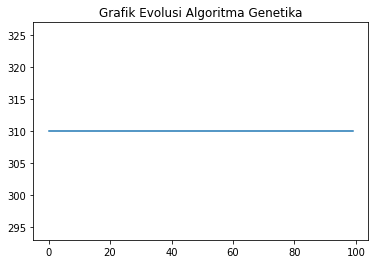

In [12]:
#tampilkan hasil optimasi
print(str(best_genotipe) + "=" + str(best_fitness) + "(" + str(idx_best_kromosom) + ")" + "(" + str(total_berat) + "kg)" )
print("Best Kromosom = "+ str(best_kromosom))
plt.title("Grafik Evolusi Algoritma Genetika")
plt.plot(list_best_fitness)
plt.show(block = False)
#plt.waitforbuttonpress()